# Dropout:  A Simple Way to Prevent Neural Networks from Overfitting

http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
Deep neural nets with a large number of parameters are very powerful machine learning systems. However, overfitting is a serious problem in such networks. Large networks are also slow to use, making it difficult to deal with overfitting by combining the predictions of many different large neural nets at test time. Dropout is a technique for addressing this problem. The key idea is to randomly drop units (along with their connections) from the neural network during training. This prevents units from co-adapting too much. During training, dropout samples from an exponential number of different “thinned” networks. At test time, it is easy to approximate the effect of averaging the predictions of all these thinned networks by simply using a single unthinned network that has smaller weights. This significantly reduces overfitting and gives major improvements over other regularization methods. We show that dropout improves the performance of neural networks on supervised learning tasks in vision, speech recognition, document classification and computational biology, obtaining state-of-the-art results on many benchmark data sets.

 why do we need dropout at all?
 The answer to these questions is “to prevent over-fitting”.
Logistic Regression might be familiar with L1 (Laplacian) and L2 (Gaussian) penalties.
    
    Dropout is an approach to regularization in neural networks which helps reducing interdependent learning amongst the neurons
    
More epochs are needed to train the networks    
    
    

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

ropout is implemented per-layer in a neural network.

It can be used with most types of layers, such as dense fully connected layers, convolutional layers, and recurrent layers such as the long short-term memory network layer.

Dropout may be implemented on any or all hidden layers in the network as well as the visible or input layer. It is not used on the output layer

It is common for larger networks (more layers or more nodes) to more easily overfit the training data.

When using dropout regularization, it is possible to use larger networks with less risk of overfitting. In fact, a large network (more nodes per layer) may be required as dropout will probabilistically reduce the capacity of the network

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

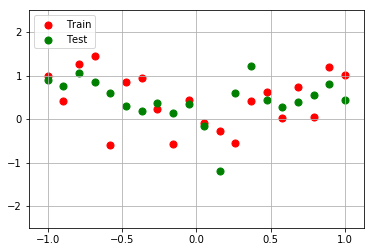

In [36]:
#tf.set_random_seed(1)
#np.random.seed(1)

# Hyper parameters
N_SAMPLES = 20
N_HIDDEN = 300
LR = 0.01

# training data
x = np.linspace(-1, 1, N_SAMPLES)[:, np.newaxis]
y = np.power(x,2) + 0.5*np.random.randn(N_SAMPLES)[:, np.newaxis]

# test data
test_x = x.copy()
test_y = np.power(test_x,2) + 0.5*np.random.randn(N_SAMPLES)[:, np.newaxis]

# show data
plt.scatter(x, y, c='red', s=50, alpha=1, label='Train')
plt.scatter(test_x, test_y, c='green', s=50, alpha=1, label='Test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.grid(True)
plt.show()

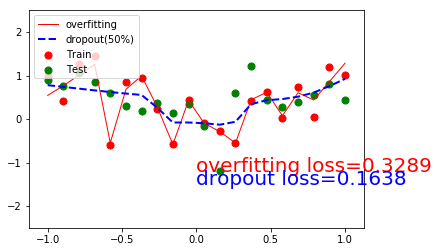

In [37]:
# tf placeholders
tf_x = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])
tf_is_training = tf.placeholder(tf.bool, None)  # to control dropout when training and testing

# overfitting net
o1 = tf.layers.dense(tf_x, N_HIDDEN, tf.nn.relu)
o2 = tf.layers.dense(o1, N_HIDDEN, tf.nn.relu)
o_out = tf.layers.dense(o2, 1)
o_loss = tf.losses.mean_squared_error(tf_y, o_out)
o_train = tf.train.AdamOptimizer(LR).minimize(o_loss)



# dropout net
d1 = tf.layers.dense(tf_x, N_HIDDEN, tf.nn.relu)

#The tf.nn.dropout has parameter keep_prob: "Probability that each element is kept"
#tf.layers.dropout has parameter rate: "The dropout rate

d1 = tf.layers.dropout(d1, rate=0.5, training=tf_is_training)   # drop out 50% of inputs
d2 = tf.layers.dense(d1, N_HIDDEN, tf.nn.relu)
d2 = tf.layers.dropout(d2, rate=0.5, training=tf_is_training)   # drop out 50% of inputs
d_out = tf.layers.dense(d2, 1)
d_loss = tf.losses.mean_squared_error(tf_y, d_out)
d_train = tf.train.AdamOptimizer(LR).minimize(d_loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

plt.ion()   # something about plotting

for t in range(500):
    sess.run([o_train, d_train], {tf_x: x, tf_y: y, tf_is_training: True})  # train, set is_training=True

    if t % 10 == 0:
        # plotting
        plt.cla()
        o_loss_, d_loss_, o_out_, d_out_ = sess.run(
            [o_loss, d_loss, o_out, d_out], {tf_x: test_x, tf_y: test_y, tf_is_training: False} # test, set is_training=False
        )
        plt.scatter(x, y, c='red', s=50, alpha=1, label='Train'); plt.scatter(test_x, test_y, c='green', s=50, alpha=1, label='Test')
        plt.plot(test_x, o_out_, 'r-', lw=1, label='overfitting'); plt.plot(test_x, d_out_, 'b--', lw=2, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % o_loss_, fontdict={'size': 20, 'color':  'red'}); plt.text(0, -1.5, 'dropout loss=%.4f' % d_loss_, fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5)); plt.pause(0.1)

plt.ioff()
plt.show()

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.422
Epoch: 0002 Avg. cost = 0.161
Epoch: 0003 Avg. cost = 0.114
Epoch: 0004 Avg. cost = 0.089
Epoch: 0005 Avg. cost = 0.073
Epoch: 0006 Avg. cost = 0.062
Epoch: 0007 Avg. cost = 0.052
Epoch: 0008 Avg. cost = 0.049
Epoch: 0009 Avg. cost = 0.040
Epoch: 0010 Avg. cost = 0.037
Epoch: 0011 Avg. cost = 0.035
Epoch: 0012 Avg. cost = 0.034
Epoch: 0013 Avg. cost = 0.029
Epoch: 0014 Avg. cost = 0.027
Epoch: 0015 Avg. cost = 0.026
Epoch: 0016 Avg. cost = 0.026
Epoch: 0017 Avg. cost = 0.023
Epoch: 0018 Avg. cost = 0.021
Epoch: 0019 Avg. cost = 0.022
Epoch: 0020 Avg. cost = 0.023
Epoch: 0021 Avg. cost = 0.020
Epoch: 0022 Avg. cost = 0.019
Epoch: 0023 Avg. cost = 0.019
Epoch: 0024 Avg. cost = 0.018
Epoch: 0025 Avg. cost = 0.016
Epoch: 0026 Avg. cost = 0.017
Epoch: 0027 Avg. c

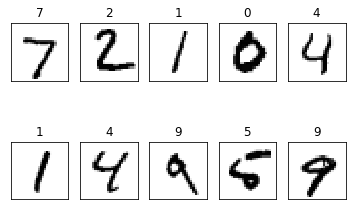

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.8})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')


is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.402
Epoch: 0002 Avg. cost = 0.145
Epoch: 0003 Avg. cost = 0.096
Epoch: 0004 Avg. cost = 0.069
Epoch: 0005 Avg. cost = 0.052
Epoch: 0006 Avg. cost = 0.040
Epoch: 0007 Avg. cost = 0.030
Epoch: 0008 Avg. cost = 0.025
Epoch: 0009 Avg. cost = 0.020
Epoch: 0010 Avg. cost = 0.021
Epoch: 0011 Avg. cost = 0.016
Epoch: 0012 Avg. cost = 0.013
Epoch: 0013 Avg. cost = 0.011
Epoch: 0014 Avg. cost = 0.014
Epoch: 0015 Avg. cost = 0.011
Epoch: 0016 Avg. cost = 0.012
Epoch: 0017 Avg. cost = 0.006
Epoch: 0018 Avg. cost = 0.009
Epoch: 0019 Avg. cost = 0.012
Epoch: 0020 Avg. cost = 0.007
Epoch: 0021 Avg. cost = 0.005
Epoch: 0022 Avg. cost = 0.010
Epoch: 0023 Avg. cost = 0.010
Epoch: 0024 Avg. cost = 0.006
Epoch: 0025 Avg. cost = 0.009
Epoch: 0026 Avg. cost = 0.004
Epoch: 0027 Avg. c

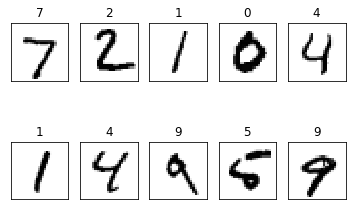

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('Optimization Finished')


is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))


labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()